# Computer Vision - P3

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Add title to the figures to explain what is displayed.

- Comments need to be in **English**.

- The deliverable of both parts must be a file named **P3_Student1_Student2.zip** that includes:
    - The notebook P3_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook.

**Deadline (Campus Virtual): November 1st, 23:00 h** 

==============================================================================================
## Practicum 3: Image and Video Segmentation

==============================================================================================

The main topics of Laboratory 3 are:

3.1. Segmentation of video shots with static scenes.

3.2. Background subtraction.

3.3. Segmentation of images.

The following chapters of the book “Computer Vision: Algorithms and Applicatons” from Richard Szeliski have further information about the topic:

* Chapter 4: Computer Vision: Algorithms and Applications.

* Chapter 5: Segmentation.



## Video segmentation

Given the video stored in ‘Barcelona-sequence’, which contains images acquired by a static camera, we ask you to:
- Find the temporal segments of the video (shots). Where the scene change? (Section 3.1)
- Extract the background images and thus, remove all the "artifacts" considered as foreground related to movement. (Section 3.2)




<img src="images/screenshot.png" width=600>

## 3.1 Segmentation of video shots

Read and visualize the sequence of images "images/Barcelona-sequence".

**Hint:** In order to read a collection of images, we wil use the function [animation.FuncAnimation](https://matplotlib.org/2.0.0/api/_as_gen/matplotlib.animation.FuncAnimation.html). Observe in the following Example, how FuncAnimation is used to read and visualize a sequence of frames. Explore the parameters of animation.FuncAnimation().

In [2]:
# Example
import numpy as np
import skimage
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [3]:
#Changing the pluggin is necessary always when visualizing a video!
%matplotlib nbagg  

In [4]:
# Reading a sequence of images from a folder
ic = io.ImageCollection('images/Barcelona-sequence/*.png')

In [5]:
fig = plt.figure()  # Create figure
im = plt.imshow(ic[0], animated=True) #Visualize the first image

def run(i):   #Updating the frame visualization
    im.set_array(ic[i]) #Changing the content of the canvas
    return im, #to return a tuple!

plt.show()
ani = animation.FuncAnimation(fig, run, interval=1, blit=True, frames=len(ic), repeat= False)
plt.show()

<IPython.core.display.Javascript object>

a) Find where a shot (scene) finishes and the following starts (the shot boundaries). To achieve this goal, we are going to compute the difference between the histograms of consecutive frames. The proposed solution required:

- Compute the histogram for each RGB channel

- The 'total' histogram of the image is computed as the sum of the three histograms

- Compute the mean of the difference (in absolute value) between the histograms of two consecutive frames

Those differences with largest values corresponds to the transitions between shots. 

Therefore, **we need to create a funtion which return an array with the differences between histograms. We will plot the resulting array in order to localice the maximum values as well as a suitable threshold to define localize the transitions.**

<img src="images/histogramshot.png" width=600>
<img src="images/difference_histograms.png">

To solve this exercise, you need to create a **temporal plot** showing a frame by frame difference measure to be defined by you, being applicable to distinguish the shots. Define a criterion to detect the boundaries of the shots and visualize it in a static plot.

In [6]:
from skimage import *

def histogram_n_bins(image, bins):
    
    image_float = img_as_float(image)
    
    red_channel, bin_centers = exposure.histogram(img_as_float(image)[:,:,0], nbins = bins)
    green_channel, bin_centers = exposure.histogram(img_as_float(image)[:,:,1], nbins = bins)
    blue_channel, bin_centers = exposure.histogram(img_as_float(image)[:,:,2], nbins = bins)
    
    return np.array(red_channel+green_channel+blue_channel)

In [7]:
#method to calculate the mean
def calcul_mitjana():
    temp = list(ic)
    prev_hist = histogram_n_bins(temp[0],64)

    plot_data = []

    for fotograma in temp[1:]:
        actual_hist = histogram_n_bins(fotograma,64)

        hist_diff = np.mean(np.abs(prev_hist - actual_hist))
        
        plot_data.append(hist_diff) # add mean value
        
        prev_hist = actual_hist
        
    return plot_data

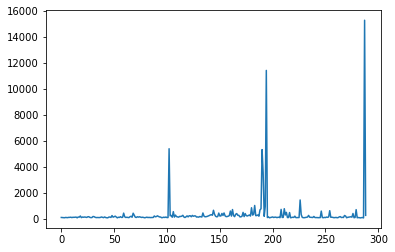

In [8]:
%matplotlib inline
llista_valors = calcul_mitjana()
plt.plot(llista_valors, "")
plt.show()

b) Additionally, create an interactive plot executing the following code in "Example A". Substitute the bottom plot with the temporal plot showing the differences between the consecutive frames. 

In [9]:
# Example A
def data_gen():
    y = 0  ## Value of interest
    t = 0  ## Temporal value
    while True:
        t += 0.05
        y += 0.1
        yield t, y

In [10]:
# Changing the pluggin is necessary always when visualizing a video!
%matplotlib nbagg  

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2,1)

# Intialize a line object on the second axes for plotting
line, = ax2.plot([], [], lw=2, color='r')

ax2.set_ylim(0, 1.1)
ax2.set_xlim(0, 5)
ax2.grid()

# Initialize the data arrays 
xdata, ydata = [], []

def run(data):
    # Update the data plot
    t, y = data
    xdata.append(t) # time = x axis
    ydata.append(y) # y axis

    # Plot image on top row
    ax1.imshow(ic[len(xdata)])
          
    # Plot sin in bottom row
    xmin, xmax = ax2.get_xlim()
    ymin, ymax = ax2.get_ylim()
    
    if t >= xmax:
        ax2.set_xlim(xmin, 2*xmax)
        ax2.figure.canvas.draw()
    
    if y >= ymax:
        ax2.set_ylim(ymin,2*ymax)
        ax2.figure.canvas.draw()
            
    # Update the data of both line objects
    line.set_data(xdata, ydata)

    return line

ani = animation.FuncAnimation(fig, run, data_gen, blit=True, interval=1, repeat=False)
plt.show()

<IPython.core.display.Javascript object>

c:\Users\JUNJIE_LI\anaconda3\lib\site-packages\matplotlib\animation.py:889: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [11]:
# Your solution here
def data_generator():
    y_data = calcul_mitjana()
    t = 0
    for y in y_data:
        t += 1
        yield t, y

In [12]:
# Changing the pluggin is necessary always when visualizing a video!
%matplotlib nbagg  

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2,1)

# Intialize a line object on the second axes for plotting
line, = ax2.plot([], [], lw=2, color='r')

ax2.set_ylim(0, 1.1)
ax2.set_xlim(0, 5)
ax2.grid()

# Initialize the data arrays 
xdata, ydata = [], []

def run(data):
    # Update the data plot
    t, y = data
    xdata.append(t) # time = x axis
    ydata.append(y) # y axis

    # Plot image on top row
    ax1.imshow(ic[len(xdata)])
          
    # Plot sin in bottom row
    xmin, xmax = ax2.get_xlim()
    ymin, ymax = ax2.get_ylim()
    
    if t >= xmax:
        ax2.set_xlim(xmin, 2*xmax)
        ax2.figure.canvas.draw()
    
    if y >= ymax:
        ax2.set_ylim(ymin,2*ymax)
        ax2.figure.canvas.draw()
            
    # Update the data of both line objects
    line.set_data(xdata, ydata)

    return line

ani = animation.FuncAnimation(fig, run, data_generator, blit=True, interval=1, repeat=False)
plt.show()

<IPython.core.display.Javascript object>

c) Show the initial and final images of each shot extracted as follows:

<img src="images_for_notebook/result_shot_detection.png">


Use the previous plot to define the proper threshold value over the differences of histograms. Use the threshold to localize indexes of the array returned by the function proposed in the previous question and, therefore, localize the initial and final frames for each shot.


In [13]:
# Your solution here
import numpy as np
import skimage
%matplotlib inline

def find_scenes(n, fig_size):
    # We get the indices of the peaks in the graph and sort them
    y_data = calcul_mitjana()
    final = np.argsort(y_data)[-n:]


    # And get the indices where the scenes start
    initial = []
    last = -1
    for i in final:
        initial.append(last+1)
        last = i
    
    images = [*initial,*final]
    images.sort()
    
    init_titles = ["Initial image shot: " + str(i+1) for i in range(n)]
    final_titles = ["Final image shot: " + str(i+1) for i in range(n)]

    titles = [None]*(len(init_titles)+len(final_titles))
    titles[::2] = init_titles
    titles[1::2] = final_titles
    
    figuras, fig_channels = plt.subplots(ncols=2, nrows=n,figsize=fig_size)
    idx = 0
    for i in range(n):
        for j in range(2):
            fig_channels[i][j].imshow(ic[images[idx]])
            fig_channels[i][j].set_title(titles[idx])
            idx += 1
    plt.show()



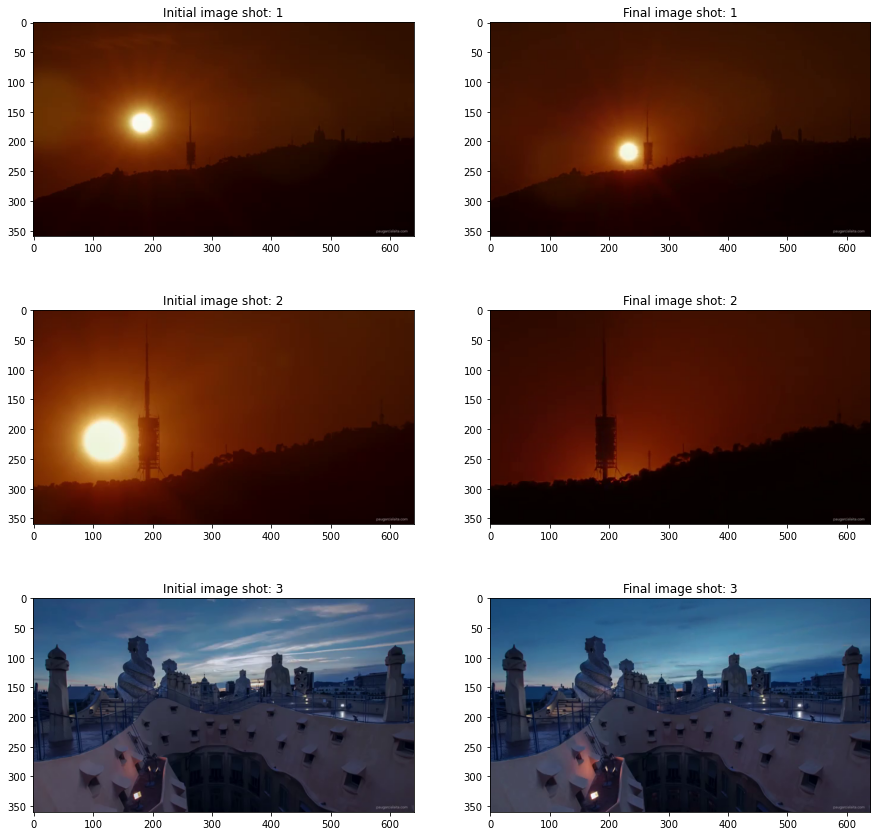

In [14]:
images = find_scenes(3, (15,15))


d) Which measure have you used in order to visually distinguish the shots in a plot? Explain your solution.

> Throught the list that contains the mean of the differences between two consecutives histograms (the mean value of RGB),
we can know that those peaks corresponds to transitions between two shots.
Our solution uses this list that contains the final shot to get the initial shot and then plot them.

e) Would your video segmentation strategy be able to separate and track objects? Argue your answer.

> It all depends on the scen, if the contrast between the scene and the object we need to track is very high, we can possibly track it since the transition between scenes it will be more clearer and we can know that the object has moved.
On the other hand, if the transitions between scenes is very slow and smooth, we can not track it since the difference is minimal, we wouldn't knew if the object has moved or not.

f) Would your video segmentation strategy be able to capture continuous transition? Argue your answer.

> If the transitions is slow and the difference between them are minimal, it wouldn't be able, but if the difference between the transitions is huge, it would be possible.

## 3.2 Background subtraction

Apply the background subtraction algorithm (check theory material).

<img src="images/screenshot2.png" width=500>

a) Visualize the following images for each different scene of the video:

    1) an image belonging to the shot
    2) the background image, and
    3) the foreground.
    
**Hint**: You can construct a mask obtained from the original image and the background in order to know which parts of the image form part from the foreground and recover from the original image just the foreground regions.

In [15]:
def showImage(figsize, original, images, titles):
    
    fig=plt.figure(figsize=figsize)

    for image in range(len(images)):
        fig.add_subplot(1,len(images), image+1)
        plt.title(titles[image])
        plt.imshow(mark_boundaries(original, images[image]))
        plt.axis('off')

    plt.show()

In [16]:
# Your solution here
%matplotlib inline

def generate_bg_fg(inicial, final):
    size = list(ic[0].shape)

    background = np.zeros((size))
    image = np.zeros((size))
    images = list()
    
    for i in range(inicial, final + 1):
        
        images.append(img_as_float(ic[i]))

    imatge = int((inicial+final))
    imatge = int(imatge/2)
    image = ic[imatge]
    background = np.median(images,axis=0)
    foreground = np.abs(images[0] - background)
    
    return (image, background, foreground)

def find_scenes(n, fig_size):

    y_data = calcul_mitjana()
    final = np.argsort(y_data)[-n:]

    initial = []
    last = -1
    for i in final:
        initial.append(last+1)
        last = i
    
    images = [*initial,*final]
    images.sort()
    scenes = list(zip(*[images[i::2] for i in range(2)]))
    images_scene = list()
    for i in range(len(scenes)):
        init = scenes[i][0]
        fin = scenes[i][1]
        bg = generate_bg_fg(init,fin) #generate its background and foreground
        images_scene.append(bg[0])
        images_scene.append(bg[1])
        images_scene.append(bg[2])
    
    original = ["Image scene " + str(i+1) for i in range(n)] 
    init_titles = ["Background Image scene " + str(i+1) for i in range(n)]
    final_titles = ["Foreground Image Scene " + str(i+1) for i in range(n)]

    titles = [None]*(len(original)+len(init_titles)+len(final_titles))
    titles[::3] = original
    titles[1::3] = init_titles
    titles[2::3] = final_titles
       
    representation, position = plt.subplots(ncols=3, nrows=n,figsize=fig_size)
    idx = 0
    for i in range(n):
        for j in range(3):
            position[i][j].imshow(images_scene[idx])
            position[i][j].set_title(titles[idx])
            idx += 1
    plt.show()

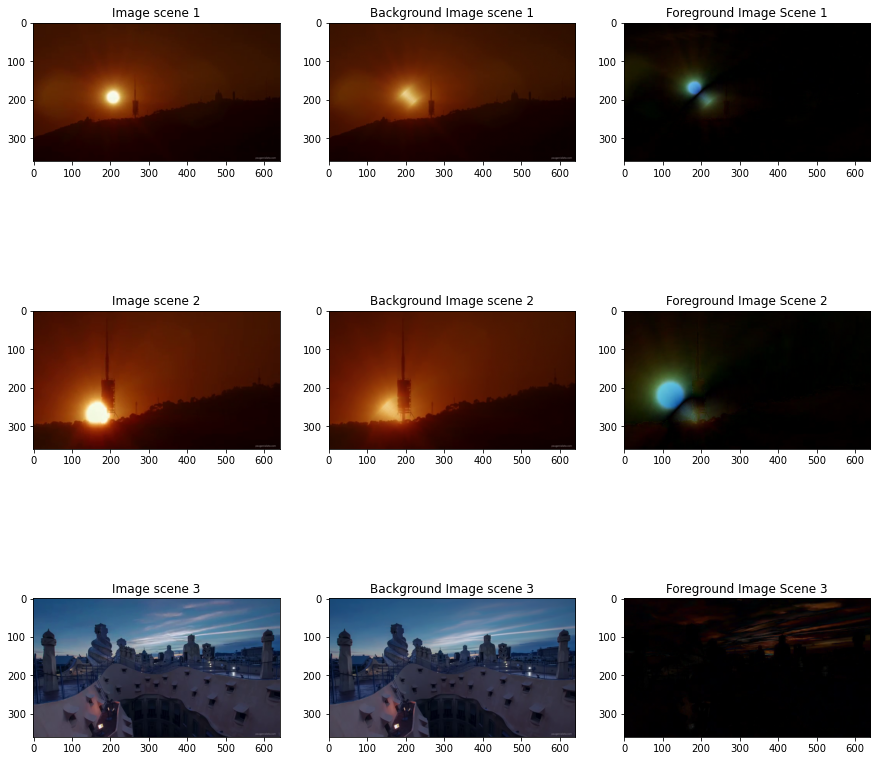

In [17]:
find_scenes(3, (15,15))

b) What do the static background images represent? 

> The static background represents the images that don't change through the timeline.

c) What happens if the shots are not correctly extracted? And, what happens if you find too many shots in the video? 


> In this case, it could end up mixing scenes so doing the mean to generate a distorted image. Therefore, the result wouldn't be as expected.

d) What happens if you subtract the background image from the original one?

> You will get the foreground image as you substract the part that doesn't change.

e) In which situations does the algorithm work and in which it does not? Do you see any additional application for this algorithm?

> The algorithm work only when the camera is at static mode and also without too many changes of contrast and illumination.


f) **[OPTIONAL]**
- Apply the algorithm to some other video that you found.

In [18]:
# Your solution here


## 3.3 Segmentation of images

Apply the image segmentation methods (Felzenswhalbs, Slic and Quickshift) based on the clustering of points corresponding to the pixels but in the feature space RGB-XY space.

**Hint**: 
- Different image segmentation commands can be found in skimage.segmentation.
- Use the function segmentation.mark_boundaries for seeing the boundaries of the segments.
- Use the inline pluggin to visualize images (%matplotlib inline).

<img src="images/image_Segmentation.png" width=600>

### Felzenszwalb's efficient graph based segmentation

a) Read 'rocki.jpeg' image from the folder 'images' and segment it using the Felzenszwalbs's method. Comment the result.


(1024, 768)
Felzenszwalb number of segments: 3711


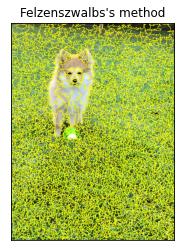

In [19]:
# Your solution here
from skimage import io
from skimage.segmentation import felzenszwalb, mark_boundaries, slic, quickshift

img = io.imread('images/rocki.jpeg')
img = img_as_float(img)
segments_fz = felzenszwalb(img, scale=100, sigma=0.5, min_size=50)

print(segments_fz.shape)
print(f"Felzenszwalb number of segments: {len(np.unique(segments_fz))}")

plt.imshow(mark_boundaries(img, segments_fz)) 
plt.title("Felzenszwalbs's method")
plt.xticks([])
plt.yticks([])
plt.show()

b) Test and explore different parameters in order to obtain a good image segmentation up to you. 
Answer the following qüestions:
- Is it critical to convert the image in grayscale in order to do the image segmentation?
- Is it critical to convert the image in float in order to do the image segmentation?
> It isn't critical to convert the image in grayscale or in float in order to do the image segmentation.

- Which are the optimal values according to your subjective perception?

> From my subjective perception, the optimal values are scale = 200, sigma = 5 and min_size = 100, the image is smoother and segmented in areas. The image is separated in different generic areas.

- How does each parameter behave?

> The scale set the segmentation level, it defines the quantity and size of segments. The min_size defines the minimum component size. The sigma defines the width of Gaussian kernel, it smoothes the image before the segmentation.





Note: You can reduce the size of the image in order to accelerate the running. Does the image reduction affect the optimal values? 



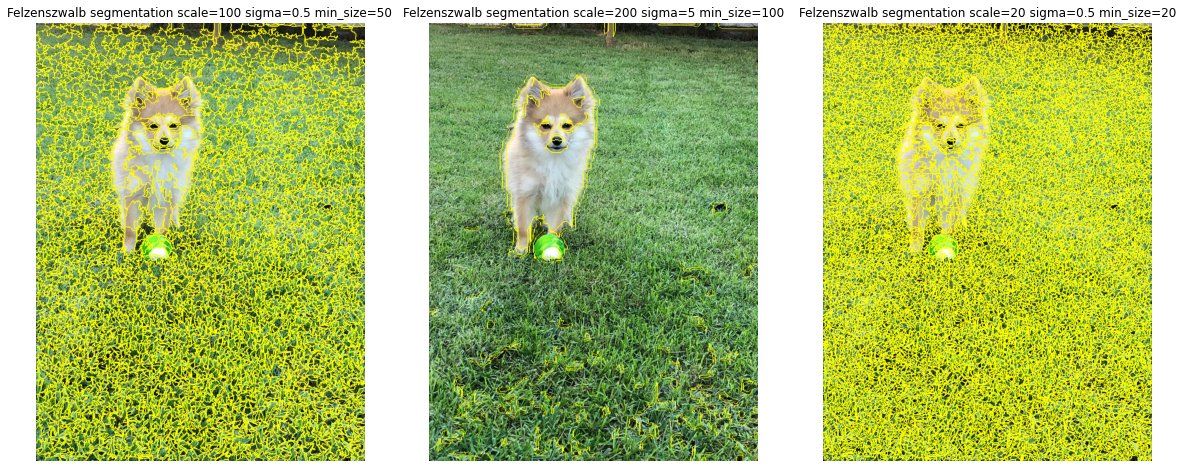

In [20]:
# Your solution here
flz_image1 = felzenszwalb(img, scale=100, sigma=0.5, min_size=50)
flz_image2 = felzenszwalb(img, scale=200, sigma=5, min_size=100)
flz_image3 = felzenszwalb(img, scale=20, sigma=0.5, min_size=20)

images = [flz_image1,flz_image2,flz_image3]

titles = ['Felzenszwalb segmentation scale=100 sigma=0.5 min_size=50',
          'Felzenszwalb segmentation scale=200 sigma=5 min_size=100',
         'Felzenszwalb segmentation scale=20 sigma=0.5 min_size=20']
         
showImage((20,20), img, images, titles)


c) Comment the definition of the algorithm (use approximately 3 lines at most), its advantages and disadvantages.

> This method is based in the efficient graph-based image segmentation algorithm. It consists in the use graph to separate the image in components. Using the difference between two components and the maximum weigth of an edge that connects two nodes of the same component. We need to define where is the boundary for segmentation.

### SLIC - K-Means based image segmentation
d) Segment the same image using the SLIC image segmentation algorithm using the parameters by default. 

SLIC number of segments: 20


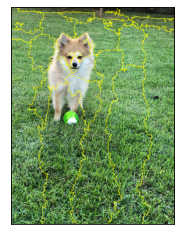

In [21]:
# Your solution here
segments_slic = slic(img, start_label=1)

print(f"SLIC number of segments: {len(np.unique(segments_slic))}")

plt.imshow(mark_boundaries(img, segments_slic))
plt.xticks([])
plt.yticks([])
plt.show()

e) Explore what are the parameters of the slic function. Test different values for these parameters in order to obtain a good image segmentation with SLIC algorithm.
Answer the following qüestions:
- Is it critical to convert the image in grayscale in order to do the image segmentation?
- Is it critical to convert the image in float in order to do the image segmentation?

    > It isn't critical to convert the image in grayscale or in float in order to do the image segmentation.

- Which are the optimal values of the optional valriables?
  
    > The optimal values are n_segments=20 compactness=0.1 sigma=3, it is segmented in the general colours and represents a good image segmentation.

- How does each parameter behave?

    > The n_segments represents the approximate number of labels of the segmented image. The compactness balances the color proximity, with the higher values, it makes superpixel shapes more cubic as we can see in the first image. The sigma defines the width of Gaussian kernel, it smoothes the image before the segmentation.

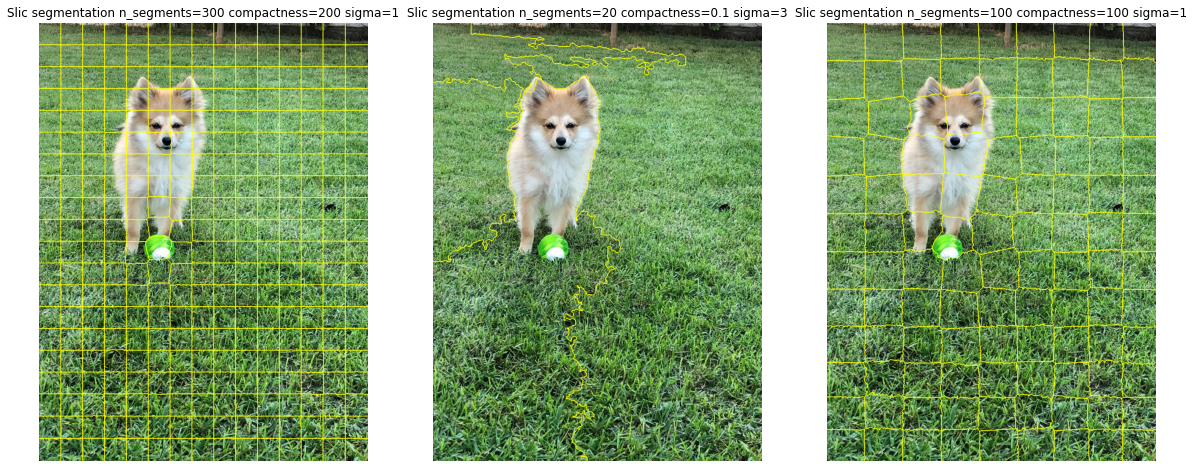

In [22]:
slic_image1 = slic(img, n_segments=300, compactness=200, sigma=1)
slic_image2 = slic(img, n_segments=20, compactness=0.1, sigma=3)
slic_image3 = slic(img, n_segments=100, compactness=100, sigma=1)

images = [slic_image1, slic_image2, slic_image3]

titles = ['Slic segmentation n_segments=300 compactness=200 sigma=1',
          'Slic segmentation n_segments=20 compactness=0.1 sigma=3',
         'Slic segmentation n_segments=100 compactness=100 sigma=1']

showImage((20,20), img, images, titles)

f) Comment what the algorithm is (in up to 3 lines).

> This method is based in the k-means clustering algorithm. It consists in selecting random points as initial clusters centers, determinating points in this center and using the Euclidian distance to find the closest point. This process will be repeated until converging to a local minimum.

### Quickshift image segmentation

g) Segment the same image using the Quickshift algorithm. 

Quickshift number of segments: 3689


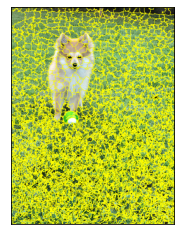

In [23]:
# Your solution here
segments_quick = quickshift(img)

print(f"Quickshift number of segments: {len(np.unique(segments_quick))}")

plt.imshow(mark_boundaries(img, segments_quick))
plt.xticks([])
plt.yticks([])
plt.show()

h) Test different parameters in order to obtain a good image segmentation with Quickshift algorithm.
Answer the following qüestions:
- Which are the optimal values?
  > he optimal values are kernel_size=10, ratio=0.01, max_dist=1, is segmented in a more datailed colour but also in a general manner.

- How does each parameter behave?
  > The kernel_size is the pixel density and its modes are estimated by using a Parzen window estimator with a Gaussian kernel of the specified size, the ratio ranges from 0-1 with values close to zero creating segments based on distance and values close to one creating segments based on color, the max_dist is the maximum distance between two pixels that the algorithm considers when building the forest.

Quickshift number of segments: 1716
Quickshift number of segments: 1948
Quickshift number of segments: 472
Quickshift number of segments: 279


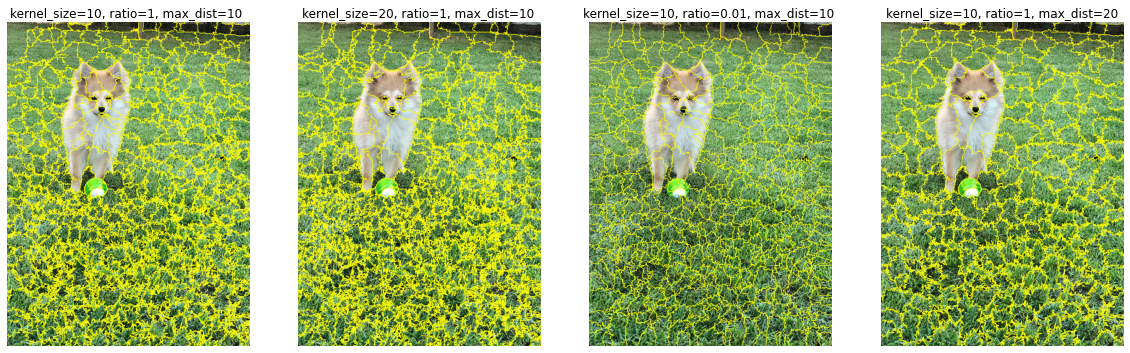

In [24]:
# Your solution here
segments_quick_0 = quickshift(img, kernel_size=10, ratio=1, max_dist=10)
print(f"Quickshift number of segments: {len(np.unique(segments_quick_0))}")

segments_quick_1 = quickshift(img, kernel_size=15, ratio=1, max_dist=10)
print(f"Quickshift number of segments: {len(np.unique(segments_quick_1))}")

segments_quick_2 = quickshift(img, kernel_size=10, ratio=0.01, max_dist=10)
print(f"Quickshift number of segments: {len(np.unique(segments_quick_2))}")

segments_quick_3 = quickshift(img, kernel_size=10, ratio=1, max_dist=20)
print(f"Quickshift number of segments: {len(np.unique(segments_quick_3))}")

images = [segments_quick_0, segments_quick_1, segments_quick_2, segments_quick_3]
titles = ['kernel_size=10, ratio=1, max_dist=10 ',
          'kernel_size=20, ratio=1, max_dist=10 ',
          'kernel_size=10, ratio=0.01, max_dist=10 ',
          'kernel_size=10, ratio=1, max_dist=20']

showImage((20,15), img, images, titles)


i) Comment what the algorithm is (in up to 3 lines).

> Is a fast mode seeking algorithm, similar to mean shift. The algorithm segments an RGB image by identifying clusters of pixels in the joint spatial and color dimensions. Segments are local and can be used as a basis for further processing.

### Comparison of segmentation algorithms
j) Plot the original image and the results of both algorithms in a 1x3 subplot using the optimal values.

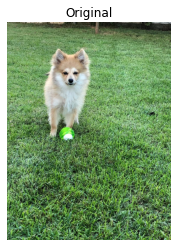

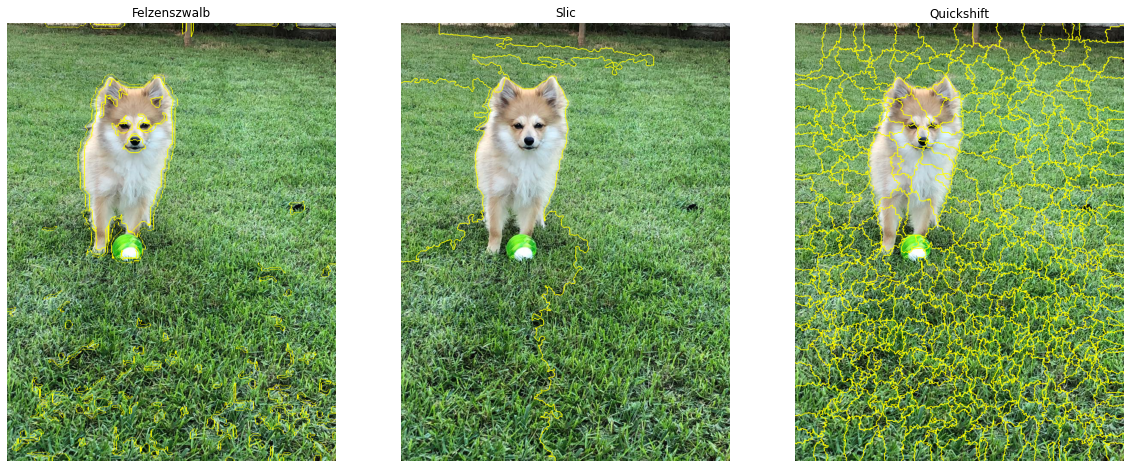

In [25]:
# Your solution here
plt.imshow(img)
plt.title("Original")
plt.axis('off')
plt.show()
images = [flz_image2, slic_image2, segments_quick_2]
titles = ["Felzenszwalb", "Slic", "Quickshift"]
showImage((20,20), img, images, titles)

k) Calculate also the number of segments obtained on the image by each of the algorithms. Can the number of segments can be used as a criterion for the performance of the algorithms?

> Yes, it can be used as a criterion for the performance, the least segments, the fastest goes.

In [26]:
# Your solution here
print(f"Felzenszwalb number of segments: {len(np.unique(flz_image2))}")
print(f"Slic number of segments: {len(np.unique(slic_image2))}")
print(f"Quickshift number of segments: {len(np.unique(segments_quick_2))}")


Felzenszwalb number of segments: 107
Slic number of segments: 4
Quickshift number of segments: 472


l) Comment the differences between each method as well as their advantages and disadvantages.

> The main difference is that the efficient graph-based image segmentation start with each point as its own cluster and iteratively merge the closest two clusters. The SLIC uses k-means cluster iteratively re-assign points to the nearest cluster center. And the Quickshift instead of iteratively shifting each point towards a local mean, forms a tree of links to the nearest neighbor which increases the density. These three algorithms are very simple, but in the first we can't know when we should stop, and we don't know how to calculate the distance between points too. And k-means needs a lot of memory and pick the points. As for Quickshift

m) Choose another couple of color and grayscale images from the folder 'images' as well as from internet and apply the three segmentation methods. Comment the results.

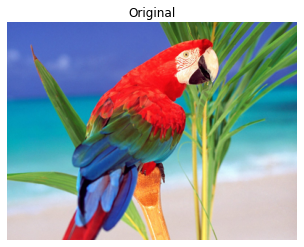

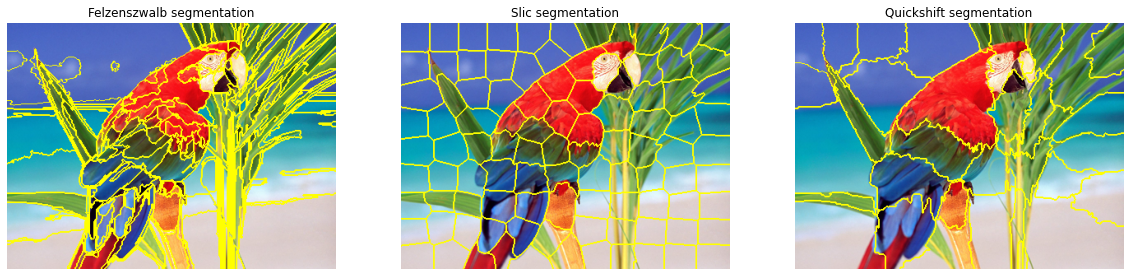

In [27]:
# Your solution here

img = io.imread('images/loro.png')
img = img_as_float(img)

flz_image = felzenszwalb(img, scale=100, sigma=0.5, min_size=50)
slic_image = slic(img, n_segments=100, compactness=100, sigma=1)
quick_image = quickshift(img, kernel_size=10, ratio=0.01, max_dist=10)

images = [flz_image, slic_image, quick_image]

titles = ['Felzenszwalb segmentation',
          'Slic segmentation',
          'Quickshift segmentation']

plt.imshow(img)
plt.title("Original")
plt.axis('off')
plt.show()

showImage((20,20), img, images, titles)